# FIFA 23 Players Analysis

TheFIFA 23 is a football simulation video game published by Electronic Arts. It is the 30th and final installment in the FIFA series that is developed by EA Sports, and released worldwide on 30 September 2022 for PC, Nintendo Switch, PlayStation 4, PlayStation 5, Xbox One, Xbox Series X/S and Google Stadia.

In this dataset, we have the information of players in the game. Let's take a look at some of the findings we got after we took a sample of the data and ran an analysis on using some of the information of the players.

### How to run the code

This is an executable [*Jupyter notebook*](https://jupyter.org) hosted on [Jovian.ml](https://www.jovian.ml), a platform for sharing data science projects. You can run and experiment with the code in a couple of ways: *using free online resources* (recommended) or *on your own computer*.

#### Option 1: Running using free online resources (1-click, recommended)

The easiest way to start executing this notebook is to click the "Run" button at the top of this page, and select "Run on Binder". This will run the notebook on [mybinder.org](https://mybinder.org), a free online service for running Jupyter notebooks. You can also select "Run on Colab" or "Run on Kaggle".


#### Option 2: Running on your computer locally

1. Install Conda by [following these instructions](https://conda.io/projects/conda/en/latest/user-guide/install/index.html). Add Conda binaries to your system `PATH`, so you can use the `conda` command on your terminal.

2. Create a Conda environment and install the required libraries by running these commands on the terminal:

```
conda create -n zerotopandas -y python=3.8 
conda activate zerotopandas
pip install jovian jupyter numpy pandas matplotlib seaborn opendatasets --upgrade
```

3. Press the "Clone" button above to copy the command for downloading the notebook, and run it on the terminal. This will create a new directory and download the notebook. The command will look something like this:

```
jovian clone notebook-owner/notebook-id
```



4. Enter the newly created directory using `cd directory-name` and start the Jupyter notebook.

```
jupyter notebook
```

You can now access Jupyter's web interface by clicking the link that shows up on the terminal or by visiting http://localhost:8888 on your browser. Click on the notebook file (it has a `.ipynb` extension) to open it.


## Downloading the Dataset

After searching a lot of datasets, I was very interested to know the insights behind the game I play on a regular basis.
The data set is from kaggle and has more than 80 columns.

In [2]:
!pip install jovian opendatasets --upgrade --quiet

Let's begin by downloading the data, and listing the files within the dataset.

In [3]:
dataset_url = 'https://www.kaggle.com/datasets/sanjeetsinghnaik/fifa-23-players-dataset/data' 

In [4]:
import opendatasets as od
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: diniljoshi1
Your Kaggle Key: ········


100%|██████████| 2.25M/2.25M [00:01<00:00, 1.31MB/s]

The dataset has been downloaded and extracted.

In [5]:
data_dir = './fifa-23-players-dataset'

In [6]:
import os
os.listdir(data_dir)

['Fifa 23 Players Data.csv']

Let us save and upload our work to Jovian before continuing.

In [7]:
project_name = "fifa-23-players-project" 

In [8]:
!pip install jovian --upgrade -q

In [9]:
import jovian

In [10]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Updating notebook "diniljoshi23/fifa-23-players-project" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/diniljoshi23/fifa-23-players-project


'https://jovian.com/diniljoshi23/fifa-23-players-project'

## Data Preparation and Cleaning

The Data is very big with a lot of players from different regions. After loading the data,we need to filter the data using only the columns we need for the analysis. We have narrowed down to six columns we need for this analysis. After we filtered the columns we also checked for missing and invalid data and found they were all normal values. 


In [11]:
import pandas as pd

In [12]:
fifa_file_path = os.path.join(data_dir, 'Fifa 23 Players Data.csv')

In [13]:
fifa_file_path

'./fifa-23-players-dataset/Fifa 23 Players Data.csv'

In [14]:
#creating a datafram to work from the downloaded data
fifa23_df = pd.read_csv(fifa_file_path)

In [15]:
#taking a look at the data
fifa23_df.head(5)

,Known As,Full Name,Overall,Potential,Value(in Euro),Positions Played,Best Position,Nationality,Image Link,Age,...,LM Rating,CM Rating,RM Rating,LWB Rating,CDM Rating,RWB Rating,LB Rating,CB Rating,RB Rating,GK Rating
0,L. Messi,Lionel Messi,91,91,54000000,RW,CAM,Argentina,https://cdn.sofifa.net/players/158/023/23_60.png,35,...,91,88,91,67,66,67,62,53,62,22
1,K. Benzema,Karim Benzema,91,91,64000000,"CF,ST",CF,France,https://cdn.sofifa.net/players/165/153/23_60.png,34,...,89,84,89,67,67,67,63,58,63,21
2,R. Lewandowski,Robert Lewandowski,91,91,84000000,ST,ST,Poland,https://cdn.sofifa.net/players/188/545/23_60.png,33,...,86,83,86,67,69,67,64,63,64,22
3,K. De Bruyne,Kevin De Bruyne,91,91,107500000,"CM,CAM",CM,Belgium,https://cdn.sofifa.net/players/192/985/23_60.png,31,...,91,91,91,82,82,82,78,72,78,24
4,K. Mbappé,Kylian Mbappé,91,95,190500000,"ST,LW",ST,France,https://cdn.sofifa.net/players/231/747/23_60.png,23,...,92,84,92,70,66,70,66,57,66,21


In [16]:
# 89 columns can be seen
fifa23_df.shape

(18539, 89)

In [17]:
#Filtering only the columns required for this analysis
fifa_df = fifa23_df.filter(['Known As','Overall','Value(in Euro)','Nationality','Age','Preferred Foot'])

In [18]:
#looking at 10 samples for the new filtered dataset
fifa_df.sample(10)

,Known As,Overall,Value(in Euro),Nationality,Age,Preferred Foot
10244,L. Marseiler,65,950000,Germany,25,Right
14692,Manu Lama,61,750000,Spain,21,Right
7014,B. Johnson,68,350000,England,35,Left
16249,B. Lyons-Foster,58,475000,England,21,Right
11688,Peter Abradanel,64,60000,Brazil,38,Right
7175,F. Bilbija,67,2300000,Germany,22,Right
10370,Rafael Brito,65,1600000,Portugal,20,Right
7486,P. Gunnarsson,67,2000000,Iceland,21,Right
6518,Wei Shihao,68,1400000,China PR,27,Right
4416,L. Carole,70,1200000,France,31,Left


In [19]:
fifa_df.tail(10)

,Known As,Overall,Value(in Euro),Nationality,Age,Preferred Foot
18529,Guo Yunqi,48,60000,China PR,25,Right
18530,S. Bag,48,110000,India,19,Right
18531,Liao Wei,48,70000,China PR,23,Right
18532,H. Singh,48,100000,India,20,Right
18533,Pi Ziyang,47,110000,China PR,19,Right
18534,D. Collins,47,110000,Republic of Ireland,21,Right
18535,Yang Dejiang,47,90000,China PR,17,Right
18536,L. Mullan,47,130000,Northern Ireland,18,Right
18537,D. McCallion,47,100000,Republic of Ireland,17,Right
18538,N. Rabha,47,60000,India,25,Left


In [20]:
#narrowed down to the necessary bits
fifa_df.shape

(18539, 6)

In [21]:
#Useful information about the data
fifa_df.describe()

,Overall,Value(in Euro),Age
count,18539.000000,1.853900e+04,18539.000000
mean,65.852042,2.875461e+06,25.240412
std,6.788353,7.635129e+06,4.718163
min,47.000000,0.000000e+00,16.000000
25%,62.000000,4.750000e+05,21.000000
50%,66.000000,1.000000e+06,25.000000
75%,70.000000,2.000000e+06,29.000000
max,91.000000,1.905000e+08,44.000000


In [22]:
#information about the columns
fifa_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18539 entries, 0 to 18538
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Known As        18539 non-null  object
 1   Overall         18539 non-null  int64 
 2   Value(in Euro)  18539 non-null  int64 
 3   Nationality     18539 non-null  object
 4   Age             18539 non-null  int64 
 5   Preferred Foot  18539 non-null  object
dtypes: int64(3), object(3)
memory usage: 869.1+ KB


In [23]:
#trying to know if there are any null values in any column
fifa_df.isnull().sum()

Known As          0
Overall           0
Value(in Euro)    0
Nationality       0
Age               0
Preferred Foot    0
dtype: int64

In [24]:
import jovian

In [25]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "diniljoshi23/fifa-23-players-project" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/diniljoshi23/fifa-23-players-project


'https://jovian.com/diniljoshi23/fifa-23-players-project'

## Exploratory Analysis and Visualization

The dataset has a lot of players. First of all we want to see what is the proportion of left and right footed players in the game.



Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [26]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

First and foremost we take a look ate the age distribution of the players. The majority of the players are in between the age of 20 to 25 especially 25.

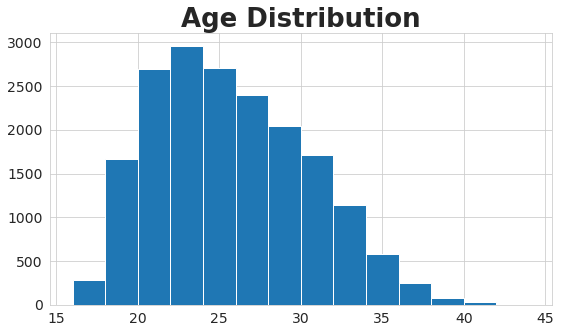

In [27]:
#Age Distribution
sns.set_style("whitegrid")

#Title the histogram with the following details
plt.title('Age Distribution',fontsize = 26, fontweight = 'bold')

#Plot a historgram using the age and 14 set of intervals
plt.hist(fifa_df.Age,bins=14);

In [28]:
overall_count_1 = fifa_df.groupby('Age').Overall.count()
overall_count_1

Age
16      31
17     249
18     626
19    1039
20    1260
21    1440
22    1602
23    1356
24    1333
25    1372
26    1282
27    1117
28    1072
29     969
30     970
31     739
32     649
33     490
34     341
35     235
36     155
37      97
38      48
39      35
40      19
41      10
42       2
44       1
Name: Overall, dtype: int64

We also took a look at the overall count and found that the maximum number of players have a rating of 65.

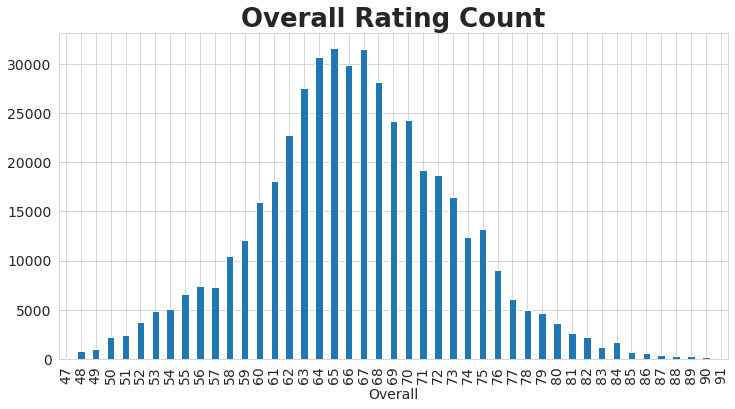

In [29]:
#Calculation of the count of each Overall
count_overall = fifa_df.groupby('Overall').Age.sum()

#Plot a figure of this size and the following title
plt.figure(figsize=(12, 6))
plt.title('Overall Rating Count',fontsize = 26, fontweight = 'bold')

#Using the calculation to plot a bar graph
count_overall.plot(kind='bar');

In [30]:
overall_count_1 = fifa_df.groupby('Overall').Overall.count()
overall_count_1

Overall
47       6
48      38
49      50
50     112
51     123
52     183
53     240
54     248
55     315
56     351
57     342
58     476
59     542
60     707
61     779
62     947
63    1126
64    1208
65    1231
66    1147
67    1195
68    1053
69     902
70     896
71     702
72     675
73     594
74     445
75     501
76     329
77     220
78     182
79     169
80     131
81      97
82      79
83      45
84      62
85      26
86      22
87      13
88      10
89      10
90       5
91       5
Name: Overall, dtype: int64

We also took a look at the top 10 highest rated players in the game.

In [31]:
#Sorting the players on the basis of overall and then by their value in descending order
fifa_df.sort_values(by = ['Overall','Value(in Euro)'],ascending = False).head(10)

,Known As,Overall,Value(in Euro),Nationality,Age,Preferred Foot
4,K. Mbappé,91,190500000,France,23,Right
3,K. De Bruyne,91,107500000,Belgium,31,Right
2,R. Lewandowski,91,84000000,Poland,33,Right
1,K. Benzema,91,64000000,France,34,Right
0,L. Messi,91,54000000,Argentina,35,Left
5,M. Salah,90,115500000,Egypt,30,Left
9,V. van Dijk,90,98000000,Netherlands,30,Right
6,T. Courtois,90,90000000,Belgium,30,Left
8,Cristiano Ronaldo,90,41000000,Portugal,37,Right
7,M. Neuer,90,13500000,Germany,36,Right


We also took a look at the top 10 lowest rated players in the game.

In [32]:
#Sorting the players on the basis of Overall and values in ascending order
fifa_df.sort_values(by = ['Overall','Value(in Euro)'],ascending = True).head(10)

,Known As,Overall,Value(in Euro),Nationality,Age,Preferred Foot
18538,N. Rabha,47,60000,India,25,Left
18535,Yang Dejiang,47,90000,China PR,17,Right
18537,D. McCallion,47,100000,Republic of Ireland,17,Right
18533,Pi Ziyang,47,110000,China PR,19,Right
18534,D. Collins,47,110000,Republic of Ireland,21,Right
18536,L. Mullan,47,130000,Northern Ireland,18,Right
18498,Ning Hao,48,15000,China PR,37,Right
18515,Gao Xiang,48,60000,China PR,21,Right
18529,Guo Yunqi,48,60000,China PR,25,Right
18496,Zhao Wenzhe,48,70000,China PR,21,Right


We also took a look a the oldest players in the game who is Gianluigi Buffon from Italy is 44 years old

In [33]:
#Sorting the players on the basis of age in descending order
fifa_df.sort_values(by = ['Age','Overall'],ascending = False).head(10)

,Known As,Overall,Value(in Euro),Nationality,Age,Preferred Foot
592,G. Buffon,79,1900000,Italy,44,Right
3276,S. Torrico,72,250000,Argentina,42,Right
13548,S. Lukić,62,45000,Bosnia and Herzegovina,42,Right
1920,J. Sand,74,0,Argentina,41,Right
2423,Rubén Castro,73,0,Spain,41,Right
3635,Bracali,71,210000,Brazil,41,Right
4499,G. Pegolo,70,180000,Italy,41,Left
4551,S. Silva,70,0,Uruguay,41,Right
7701,N. Penneteau,67,110000,France,41,Left
9824,A. Pomini,65,80000,Italy,41,Right


We also took a look a the youngest as there were 31 players who were 16 years of age.

In [34]:
#Sorting the players on the basis of age in ascending order
fifa_df.sort_values(by = ['Age','Overall'],ascending = True).head(10)

,Known As,Overall,Value(in Euro),Nationality,Age,Preferred Foot
18524,A. Brînzea,48,130000,Romania,16,Right
18447,Du Yuezheng,49,120000,China PR,16,Right
18459,E. Topcu,49,100000,Republic of Ireland,16,Right
18365,T. Kristiansen,50,140000,Norway,16,Left
18398,M. Caputo,50,130000,Australia,16,Right
18425,M. Moraru,50,150000,Romania,16,Right
18232,B. Faraas,51,180000,Norway,16,Right
18284,D. Lipsiuc,51,130000,Republic of Ireland,16,Right
18188,A. Andresen,52,230000,Denmark,16,Right
18205,A. Breuer,52,250000,Germany,16,Right


In [35]:
#calculating the number of players who are of age 16
total = fifa_df[fifa_df.Age == 16].shape[0]
print(total)

31


In the dataset, we take a look at the top 10 most valued players and plot a bar graph to clearly see them.

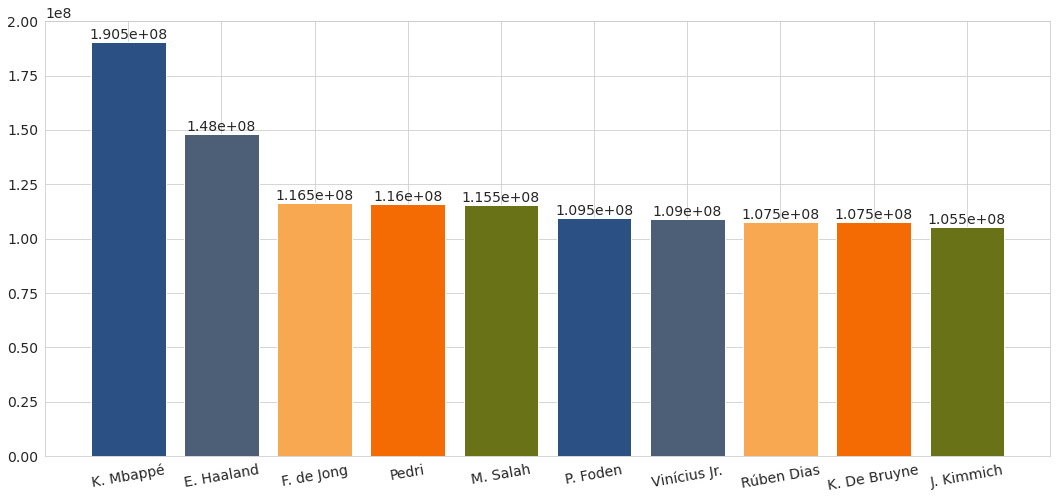

In [36]:
#calculation of top value player
top_val_players = fifa_df.sort_values(by = 'Value(in Euro)',ascending = False).head(10)

#plotting bar graph of top 10 most valuable players
plt.figure(figsize = (18,8))
plt.bar_label(plt.bar(x = top_val_players['Known As'],height = top_val_players['Value(in Euro)'],color = 
["#2A5084","#4C5f76", "#f7A851", "#F46A03", "#697217"]));

#using the tick_params parameter to rotate the player names so it can be visible
plt.tick_params(axis = 'x', rotation=10)


We also took a look at the 10 least valued players in the game.

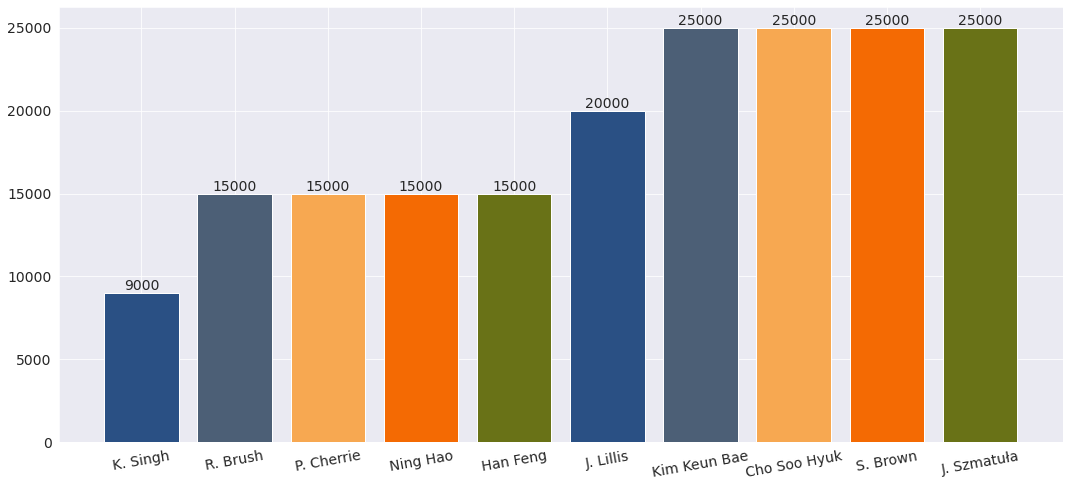

In [37]:
sns.set_style('darkgrid')

low_val_players = fifa_df[fifa_df['Value(in Euro)'] != 0].sort_values(by = 'Value(in Euro)',ascending = True).head(10)

plt.figure(figsize = (18,8))
plt.bar_label(plt.bar(x = low_val_players['Known As'],height = low_val_players['Value(in Euro)'],color = 
["#2A5084","#4C5f76", "#f7A851", "#F46A03", "#697217"]));

plt.tick_params(axis = 'x', rotation=10)


For a interesting insight, we looked at the average overall for every country. We divide the total overall of a country by the number of players. Libya has the highest Overall to players ratio and Uzbekistan and Brazil are in second and third.

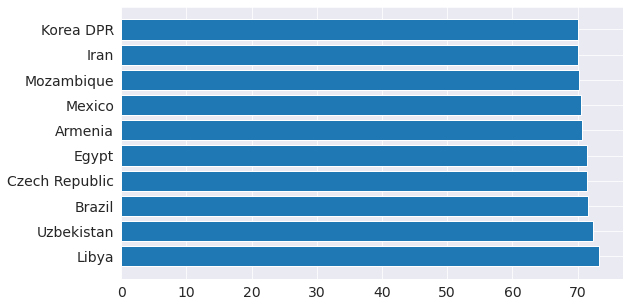

In [48]:
a = round(fifa_df.groupby('Nationality')['Overall'].mean().sort_values(ascending = False).head(10),2)
plt.barh(a.index,a);

Whereas at the other end of the spectrum South Sudan has the lowest Overall to players count ratio and Barbados and India are a close second and third.

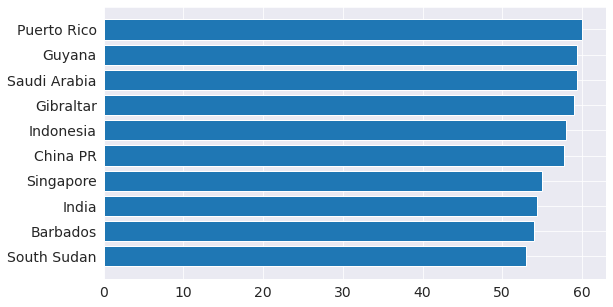

In [49]:
b = round(fifa_df.groupby('Nationality')['Overall'].mean().sort_values(ascending = True).head(10),2)
plt.barh(b.index,b);

Let us save and upload our work to Jovian before continuing

In [179]:
import jovian

In [180]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "diniljoshi23/fifa-23-players-project" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/diniljoshi23/fifa-23-players-project


'https://jovian.com/diniljoshi23/fifa-23-players-project'

## Asking and Answering Questions

After some of the exploring the data and finding interesting insights. We asked 5 interesting questions about the dataset and these are the answers.



#### Q1: What is the proportion of players who prefer to use the Left foot?

#After the calculation 75.8% of the players are right-footed whereas 24.2% are left-footed.

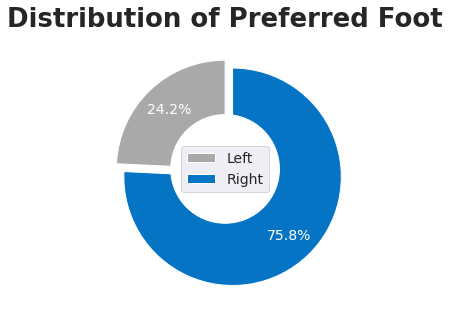

In [43]:
#calculating the number of players who prefer the left foot
left_foot = fifa_df[fifa_df['Preferred Foot']=='Left'].count()[0]
#calculating the number of players who prefer the right foot
right_foot = fifa_df[fifa_df['Preferred Foot']=='Right'].count()[0]

#draw and title the figure
plt.figure(figsize=(5, 5))
plt.title("Distribution of Preferred Foot", fontsize=26, fontweight='bold')

#draw a pie chart using the hex code for the colors, autopct for percentage of the players, pctdistance for the position of the labels, explode to focus on the proportion of left footed players, startangle and the color of labels.
plt.pie(np.array([left_foot,right_foot]),colors = ['#A9A9A9','#0674C4'],autopct='%1.1f%%', pctdistance=0.75,explode = [0,0.1], startangle=90,textprops=dict(color="white"));

# draw circle
centre_circle = plt.Circle((0, 0), 0.50, fc='white');
fig = plt.gcf();

# Adding Circle in Pie chart to make it as a donut chart
fig.gca().add_artist(centre_circle);

#legend
plt.legend(['Left','Right'],loc = "center");

#### Q2: Which player has the highest and the lowest value in the game?

Kylian Mbappe is the player who has the highest value in the game. Followed by Erling Haland , Frankie De Jong and others.

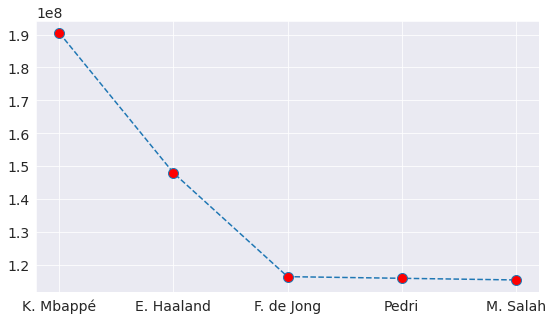

In [63]:
v = fifa_df.sort_values(by = 'Value(in Euro)',ascending = False).head(5)
plt.plot(v['Known As'],v['Value(in Euro)'],marker = 'o',linestyle='--',mfc = 'red',ms =10);

Karanjit Singh is the player who has the highest value in the game. Followed by Brush, Cherrie and others.

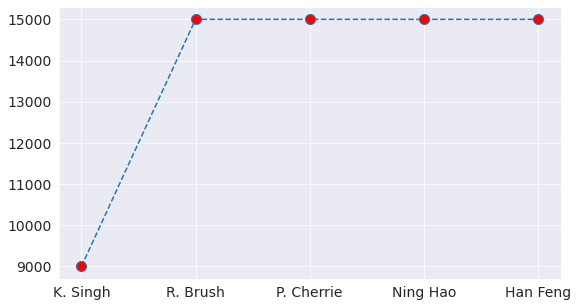

In [64]:
x = fifa_df[fifa_df['Value(in Euro)'] != 0].sort_values(by = 'Value(in Euro)',ascending = True).head(5)
plt.plot(x['Known As'],x['Value(in Euro)'],marker = 'o',linestyle='--',mfc = 'red',ms =10);

#### Q3: Which country has the most  and least number of players in the game?

England has the most number of players in the game. Germany comes in at close second and Spain in third

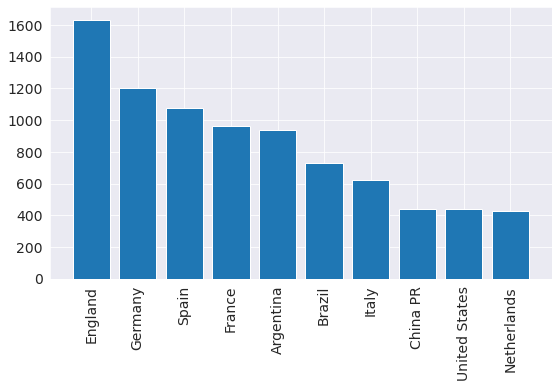

In [73]:
nat = fifa_df.groupby('Nationality').Overall.count().sort_values(ascending = False).head(10)
plt.bar(nat.index, nat);
plt.xticks(rotation = 90);

There are 20 countries who have a single player in the game including Afghanistan, Kazakhstan, Guam, Singapore and others. Also Barbados is the country among countries with one player with the lowest overall whereas Fiji is the country with the country with one player with the highest overall.

In [75]:
#Calculate the number of players for each country
overall_count = fifa_df.groupby('Nationality').Overall.count()

#Calculate the countries who have only one player
single_player_country = overall_count[overall_count == 1].index
single_player_country


Index(['Afghanistan', 'Andorra', 'Barbados', 'Bermuda', 'Chad', 'Fiji',
       'Gibraltar', 'Guam', 'Guatemala', 'Indonesia', 'Kazakhstan',
       'Korea DPR', 'Lebanon', 'Liechtenstein', 'Mauritius', 'Palestine',
       'Papua New Guinea', 'Singapore', 'São Tomé e Príncipe', 'Vietnam'],
      dtype='object', name='Nationality')

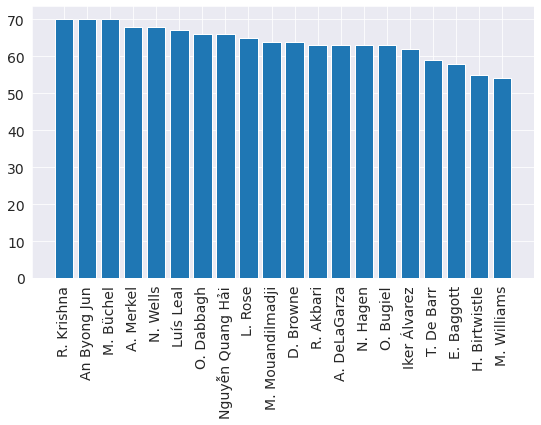

In [78]:
players_from_one_countryt = fifa_df[fifa_df['Nationality'].isin(single_player_country)]
players_from_one_countryt.sort_values(by = 'Overall',ascending = True)
plt.bar(players_from_one_countryt['Known As'],players_from_one_countryt['Overall']);
plt.xticks(rotation = 90);

#### Q4: Is there a relationship between Age, Overall and Market Value?

Let us take a look at the relationship between age, overall and value of the players. Age and Overall seem to not have a directly proportional relationship whereas Value seems to increase after 20 and starts declining after 30 in general. Overall and Value are directly proportional. When a player's overall increases their value also increases.

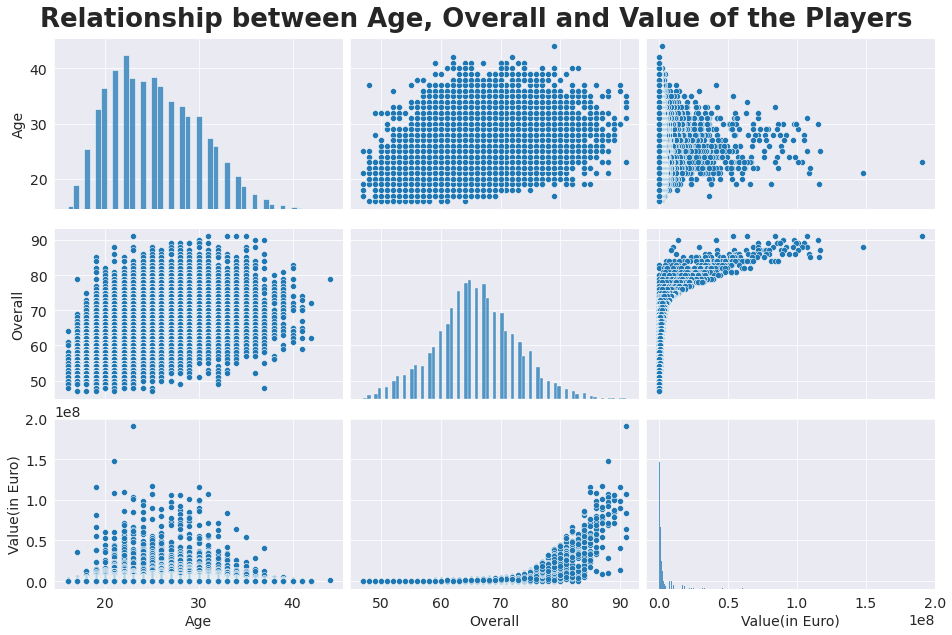

In [131]:
# Create a pair plot to showcase relationship between age, overall and value of the players.
pp = sns.pairplot(fifa_df[['Age', 'Overall', 'Value(in Euro)']],height=3, aspect=1.5);

# Adjust layout to avoid overlapping
pp.fig.subplots_adjust(top=.93)  # Increasing top margin

#Adding the title with the following details
pp.fig.suptitle("Relationship between Age, Overall and Value of the Players",fontsize = 26, fontweight = 'bold');



#### Q5: What is the percentage of the players who have an overall of more than 70, 80 and 90?

23.0% (4322) of players have overall above 70.
 2.0% (374) of players have overall above 80.
0.03% (5) of players have overall above 90.

In [80]:
#Total number of players in the game
total_players = fifa_df.Overall.count()
total_players

18539

In [81]:
#Players who have an overall of over 70
players_above_50 = fifa_df[fifa_df['Overall'] > 50].count()[0]
players_above_50

#Players who have an overall of over 70
players_above_60 = fifa_df[fifa_df['Overall'] > 60].count()[0]
players_above_60

#Players who have an overall of over 70
players_above_70 = fifa_df[fifa_df['Overall'] > 70].count()[0]
players_above_70

#Players who have an overall of over 80
players_above_80 = fifa_df[fifa_df['Overall'] > 80].count()[0]
players_above_80

#Players who have an overall of over 90
players_above_90 = fifa_df[fifa_df['Overall'] > 90].count()[0]
players_above_90

5

In [82]:
percent_50 = round(players_above_50/total_players,2) * 100
percent_60 = round(players_above_60/total_players,2) * 100
percent_70 = round(players_above_70/total_players,2) * 100
percent_80 = round(players_above_80/total_players,2) * 100
percent_90 = round(players_above_90/total_players,4) * 100
rem = 100 - (percent_50 + percent_60 + percent_70 + percent_80 + percent_90)
print(f"{percent_50}% ({players_above_50}) of players have overall above 50\n{percent_60}% ({players_above_60}) of players have overall above 60\n{percent_70}% ({players_above_70}) of players have overall above 70\n {percent_80}% ({players_above_80}) of players have overall above 80\n{percent_90}% ({players_above_90}) of players have overall above 90\n")

99.0% (18333) of players have overall above 50
80.0% (14806) of players have overall above 60
23.0% (4322) of players have overall above 70
 2.0% (374) of players have overall above 80
0.03% (5) of players have overall above 90



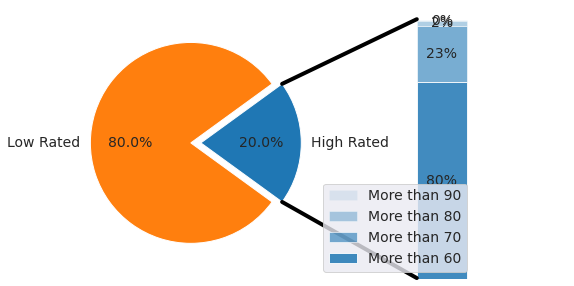

In [84]:
import matplotlib.pyplot as plt
import numpy as np

from matplotlib.patches import ConnectionPatch

# make figure and assign axis objects
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 5))
fig.subplots_adjust(wspace=0)

# pie chart parameters
overall_ratios = [.20, .80]
labels = ['High Rated', 'Low Rated']
explode = [0.1, 0]
# rotate so that first wedge is split by the x-axis
angle = -180 * overall_ratios[0]
wedges, *_ = ax1.pie(overall_ratios, autopct='%1.1f%%', startangle=angle,labels=labels, explode=explode)

# bar chart parameters
age_ratios = [.80, .23, .02, .003]
age_labels = ['More than 60', 'More than 70', 'More than 80', 'More than 90']
bottom = 1.05
width = .2

# Adding from the top matches the legend.
for j, (height, label) in enumerate(reversed([*zip(age_ratios, age_labels)])):
    bottom -= height
    bc = ax2.bar(0, height, width, bottom=bottom, color='C0', label=label,
                 alpha=0.1 + 0.25 * j)
    ax2.bar_label(bc, labels=[f"{height:.0%}"], label_type='center')

# ax2.set_title('Age of approvers')
ax2.legend()
ax2.axis('off')
ax2.set_xlim(- 2.5 * width, 2.5 * width)

# use ConnectionPatch to draw lines between the two plots
theta1, theta2 = wedges[0].theta1, wedges[0].theta2
center, r = wedges[0].center, wedges[0].r
bar_height = sum(age_ratios)

# draw top connecting line
x = r * np.cos(np.pi / 180 * theta2) + center[0]
y = r * np.sin(np.pi / 180 * theta2) + center[1]
con = ConnectionPatch(xyA=(-width / 2, bar_height), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
con.set_linewidth(4)
ax2.add_artist(con)

# draw bottom connecting line
x = r * np.cos(np.pi / 180 * theta1) + center[0]
y = r * np.sin(np.pi / 180 * theta1) + center[1]
con = ConnectionPatch(xyA=(-width / 2, 0), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
ax2.add_artist(con)
con.set_linewidth(4)


Let us save and upload our work to Jovian before continuing.

In [85]:
import jovian

In [86]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "diniljoshi23/fifa-23-players-project" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/diniljoshi23/fifa-23-players-project


'https://jovian.com/diniljoshi23/fifa-23-players-project'

## Inferences and Conclusion

After the analysis, we can draw a conclusion that a player's overall is not dependent on age but after 30 it starts to decline. Also with increase in overall the value also increases.Only 2% of players have an overall above 80 and England has the most number of players. Libya has the highest overall to player count ratio and also Kylian Mbappe is the most valued player in the game. 5 players including Mbappe, Haland and others have the highest overall in the game. Most number of players are of age 22 and have the rating of 65.

In [87]:
import jovian

In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "diniljoshi23/fifa-23-players-project" on https://jovian.com


## References and Future Work

For a future project we can use all of the columns in the dataset to diver deeper and gain further insights on the players stats and attributes.

In [146]:
import jovian

In [147]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "diniljoshi23/fifa-23-players-project" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/diniljoshi23/fifa-23-players-project


'https://jovian.com/diniljoshi23/fifa-23-players-project'